# Завдання 1

У цьому завданні вам потрібно завантажити [цей](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019/download) датасет. Ми з вами вже працювали з ним коли вивчали `pandas`. Це все так само Топ-50 книг, що найбільше продаються на Amazon в період з 2009 по 2019 роки. Потрібно виконати таке:

1. Створити спарк сесію.
2. Прочитати датасет до датафрейму.
3. Використовуючи тільки RDD обчислити середню ціну всіх книг, у яких рейтинг вищий за 4.7
4. Побудувати гістограму розподілу рецензій (стовпець Reviews).
5. Побудувати матрицю кореляції для стовпців "User Rating", "Reviews" та "Price".
6. Використовуючи бібліотеку seaborn побудувати парні графіки (pairplots) стовпців "User Rating", "Reviews" та "Price".

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d sootersaalu/amazon-top-50-bestselling-books-2009-2019
!unzip amazon-top-50-bestselling-books-2009-2019

  0% 0.00/14.5k [00:00<?, ?B/s]
100% 14.5k/14.5k [00:00<00:00, 10.0MB/s]
Archive:  amazon-top-50-bestselling-books-2009-2019.zip
  inflating: bestsellers with categories.csv  


In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 16.6 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=f995c7c98468d46ce46d703095cb53f78e94c65515b055a0fd80b6e092f4c498
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
import pandas as pd
import pyspark
from pyspark.sql import SparkSession

## 1. Створити спарк сесію

In [ ]:
spark_session = SparkSession.builder.getOrCreate()

## 2. Прочитати датасет до датафрейму

In [ ]:
books_df = spark_session.read.csv('bestsellers with categories.csv', header=True, inferSchema=True)
books_df.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

## 3. Використовуючи тільки RDD обчислити середню ціну всіх книг, у яких рейтинг вищий за 4.7

In [ ]:
books_df.filter(books_df['User Rating'] > 4.7).agg({'Price': 'mean'}).show()

+-----------------+
|       avg(Price)|
+-----------------+
|10.69832402234637|
+-----------------+



## 4. Побудувати гістограму розподілу рецензій (стовпець Reviews)

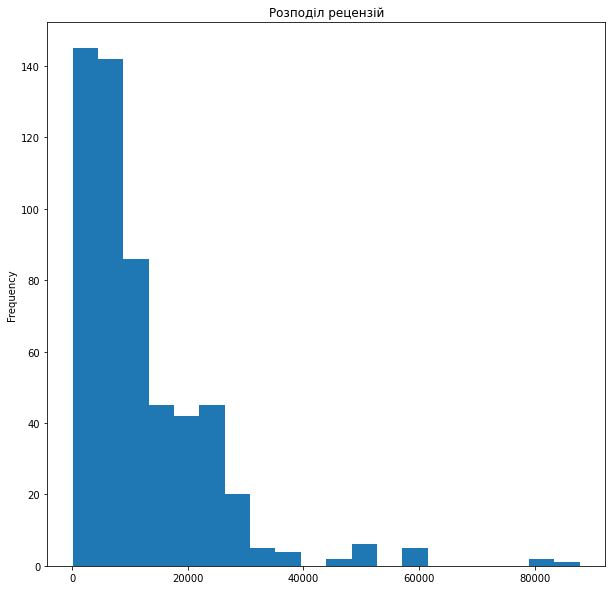

In [ ]:
import matplotlib.pyplot as plt

books_pd_df = books_df.toPandas()

books_pd_df['Reviews'].plot(kind='hist', bins=20, figsize=(10, 10))
plt.title('Розподіл рецензій')
plt.show()

## 5. Побудувати матрицю кореляції для стовпців "User Rating", "Reviews" та "Price"

In [ ]:
corr = books_pd_df.loc[:, ['User Rating', 'Reviews', 'Price']].corr()
corr.style.background_gradient(cmap='BrBG')

,User Rating,Reviews,Price
User Rating,1.000000,-0.001729,-0.133086
Reviews,-0.001729,1.000000,-0.109182
Price,-0.133086,-0.109182,1.000000


## 6. Використовуючи бібліотеку seaborn побудувати парні графіки (pairplots) стовпців "User Rating", "Reviews" та "Price"

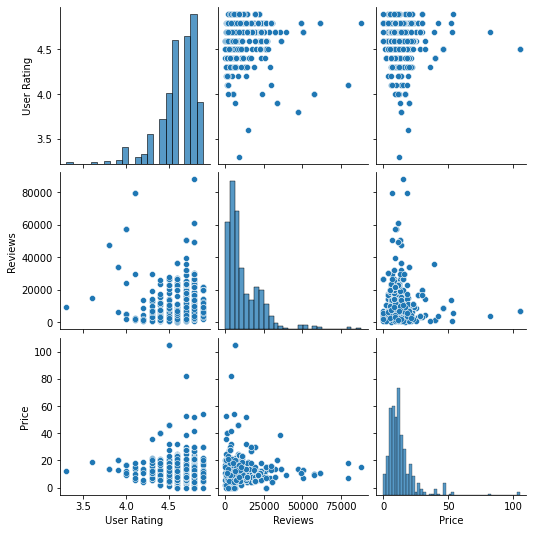

In [ ]:
import seaborn as sns

sns.pairplot(books_pd_df.loc[:, ['User Rating', 'Reviews', 'Price']]);

# Завдання 2

Під час виконання цього завдання можна використовувати лише Spark SQL. Для датасету з попереднього завдання виконайте таке:

1. Знайдіть автора із найвищим рейтингом.
2. Знайдіть трьох авторів із найнижчим рейтингом.
3. Визначте, який автор отримав найбільшу кількість рецензій.
4. Визначте, який автор написав найбільшу кількість книг за весь доступний у даних період.
5. Визначте, яка книга жанру "Fiction" має найменший рейтинг.
6. Визначте, яка книга жанру "Non Fiction" має найвищий рейтинг.

In [ ]:
books_df.withColumnRenamed('User Rating', 'User_Rating').createOrReplaceTempView('Books')

In [ ]:
spark_session.sql('Select * From Books').show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User_Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

## 1. Знайдіть автора із найвищим рейтингом

In [ ]:
spark_session.sql('Select Author, avg(User_Rating) as Avg_Rating From Books Group By Author Order By Avg_Rating desc Limit 1').show()

+----------+----------+
|    Author|Avg_Rating|
+----------+----------+
|Jill Twiss|       4.9|
+----------+----------+



##2. Знайдіть трьох авторів із найнижчим рейтингом

In [ ]:
spark_session.sql('Select Author, avg(User_Rating) as Avg_Rating From Books Group By Author Order By Avg_Rating Limit 3').show()

+--------------+----------+
|        Author|Avg_Rating|
+--------------+----------+
|   Donna Tartt|       3.9|
| Gillian Flynn|       4.0|
|Muriel Barbery|       4.0|
+--------------+----------+



##3. Визначте, який автор отримав найбільшу кількість рецензій

In [ ]:
spark_session.sql('Select Author, sum(Reviews) as All_Reviews From Books Group By Author Order By All_Reviews desc Limit 1').show()

+---------------+-----------+
|         Author|All_Reviews|
+---------------+-----------+
|Suzanne Collins|     278329|
+---------------+-----------+



##4. Визначте, який автор написав найбільшу кількість книг за весь доступний у даних період

In [ ]:
spark_session.sql('Select Author, count(Author) as All_Books From Books Group By Author Order By All_Books desc Limit 1').show()

+-----------+---------+
|     Author|All_Books|
+-----------+---------+
|Jeff Kinney|       12|
+-----------+---------+



##5. Визначте, яка книга жанру "Fiction" має найменший рейтинг

In [ ]:
spark_session.sql('Select Name, User_Rating From Books Where Genre = "Fiction" Order By User_Rating Limit 1').show()

+------------------+-----------+
|              Name|User_Rating|
+------------------+-----------+
|The Casual Vacancy|        3.3|
+------------------+-----------+



##6. Визначте, яка книга жанру "Non Fiction" має найвищий рейтинг

In [ ]:
spark_session.sql('Select Name, User_Rating From Books Where Genre = "Non Fiction" Order By User_Rating desc Limit 1').show()

+--------------------+-----------+
|                Name|User_Rating|
+--------------------+-----------+
|Hamilton: The Rev...|        4.9|
+--------------------+-----------+



#Завдання 3

Побудуйте гістограму середньої кількості рецензій за роками. У вигляді окремої гістограми візуалізуйте кількість книг жанру "Fiction" та "Non Fiction" за весь доступний період.

In [ ]:
books_by_years = books_df.groupBy('Year').agg({'Reviews': 'mean'}).orderBy('Year').toPandas()
books_by_years

,Year,avg(Reviews)
0,2009,4710.12
1,2010,5479.62
2,2011,8100.82
3,2012,13090.92
4,2013,13098.14
5,2014,15859.94
6,2015,14233.38
7,2016,14196.00
8,2017,12888.40
9,2018,13930.42


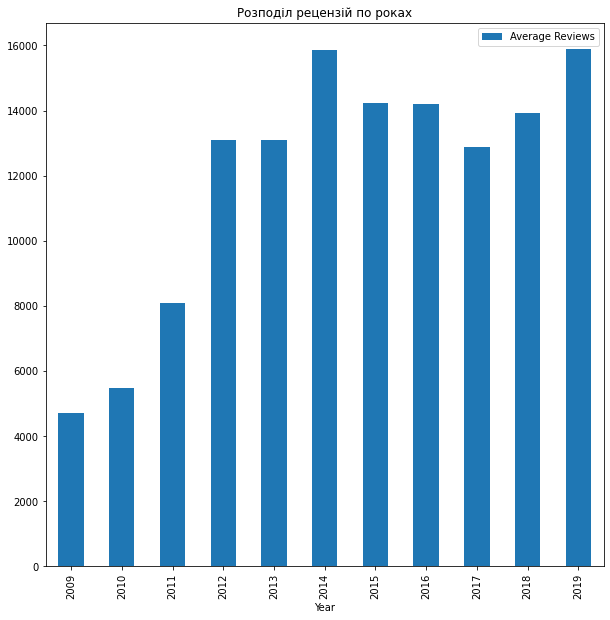

In [ ]:
books_by_years.plot(kind='bar', x='Year', y='avg(Reviews)', figsize=(10, 10), label='Average Reviews')
plt.title('Розподіл рецензій по роках')
plt.show()

In [ ]:
books_by_genre_years = books_df.groupBy('Year', 'Genre').agg({'Name': 'count'}).orderBy('Year', 'Genre').toPandas()
books_by_genre_years

,Year,Genre,count(Name)
0,2009,Fiction,24
1,2009,Non Fiction,26
2,2010,Fiction,20
3,2010,Non Fiction,30
4,2011,Fiction,21
5,2011,Non Fiction,29
6,2012,Fiction,21
7,2012,Non Fiction,29
8,2013,Fiction,24
9,2013,Non Fiction,26


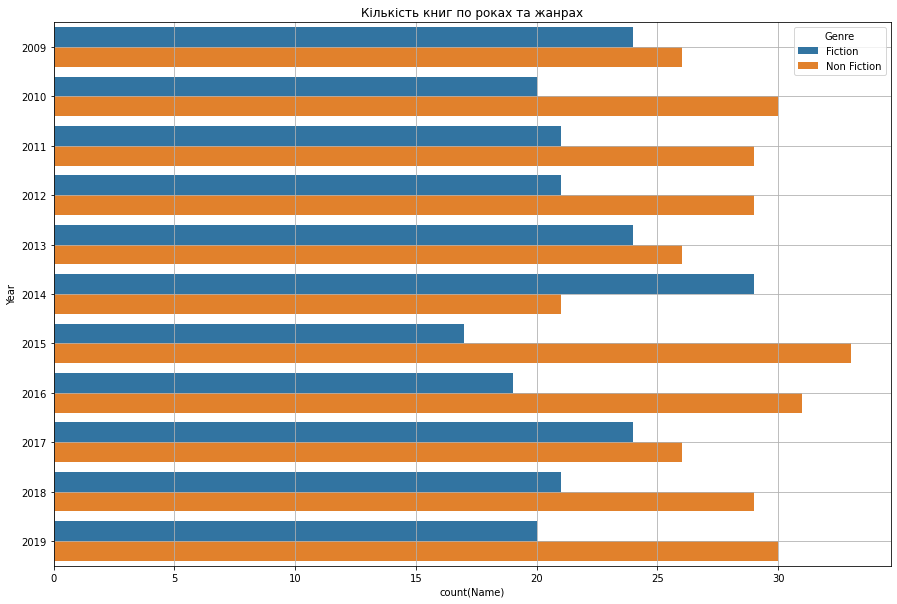

In [68]:
plt.figure(figsize=(15,10))
sns.barplot(data=books_by_genre_years, y="Year", x='count(Name)', hue="Genre", orient='h')
plt.title('Кількість книг по роках та жанрах')
plt.grid()
plt.show()